In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
# Make sure your CSV file has appropriate column headers.
df = pd.read_csv('Salary Data.csv')

# Display the first few rows of the dataset
df.head(20)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


Text(0.5, 1.0, 'Distribution of Ages')

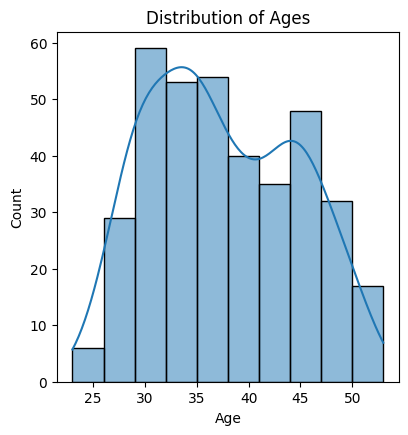

In [3]:
# Data Visualization
plt.figure(figsize=(15, 10))

# Chart 1: Distribution of Ages
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Ages')

Text(0.5, 1.0, 'Gender Distribution')

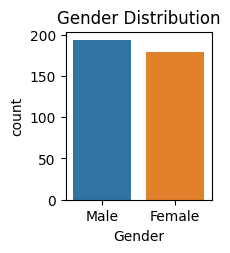

In [4]:
# Chart 2: Gender Distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Years of Experience vs. Salary')

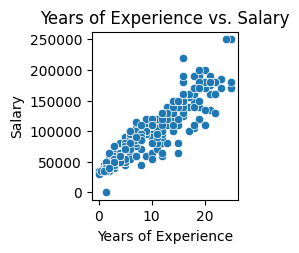

In [5]:
# Chart 3: Scatter plot of Years of Experience vs. Salary
plt.subplot(2, 3, 3)
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Years of Experience vs. Salary')

Text(0.5, 1.0, 'Salary by Education Level')

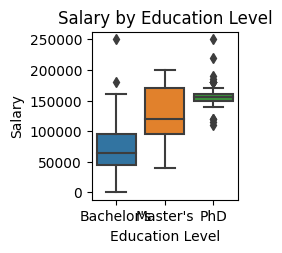

In [6]:
# Chart 4: Box plot of Salary by Education Level
plt.subplot(2, 3, 4)
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary by Education Level')


In [7]:
# Simple Linear Regression
df.dropna(inplace=True)
df['Years of Experience'] = df['Years of Experience'].astype(int)
X = df[['Years of Experience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

In [8]:
# R-squared score
r2_score = model.score(X_test, y_test)
print(f'R-squared Score: {r2_score}')


R-squared Score: 0.8989307400123604


In [11]:
# Assuming 'specific_years' is the specific value for which you want to predict
specific_years = 21.0  # Replace this with the specific value you're interested in

# Convert the specific_years to a NumPy array and reshape it
specific_years_array = np.array(specific_years).reshape(-1, 1)

# Make the prediction using the trained model
predicted_salary = model.predict(specific_years_array)

# Display the result
print(f"For {specific_years} years of experience, the predicted salary is: {predicted_salary[0]:.2f}")


For 21.0 years of experience, the predicted salary is: 174660.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


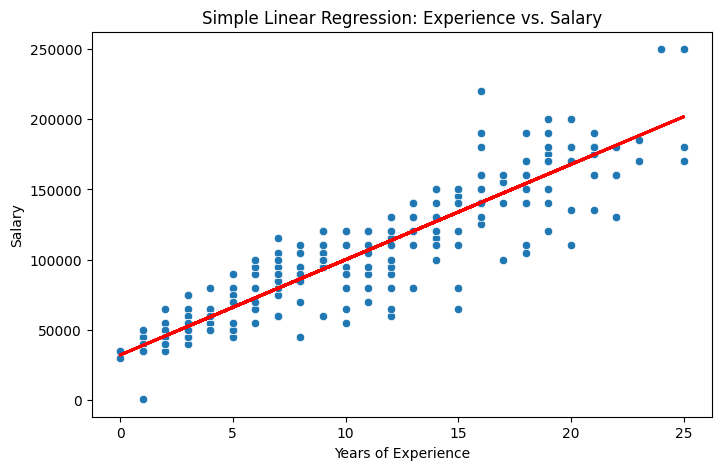

In [10]:
# Visualizing the Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Simple Linear Regression: Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()